In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [72]:
df = pd.read_csv('CSCI_Fall_2024_survey.csv')


In [35]:
# Standardize birth place
df['birth_place'] = np.where(df["What state/country were you born in?"].str.contains('Missouri'), 'Missouri',
                    np.where(df["What state/country were you born in?"].str.contains('mo', case=False), 'Missouri',
                    np.where(df["What state/country were you born in?"].str.contains('Kansas'), 'Kansas',
                    np.where(df["What state/country were you born in?"].str.contains('TEXAS'), 'Texas',
                    # countries
                    np.where(df["What state/country were you born in?"].str.contains('india', case=False), 'India',
                    np.where(df["What state/country were you born in?"].str.contains('China'), 'China',
                    np.where(df["What state/country were you born in?"].str.contains('Germany'), 'Germany',
                    np.where(df["What state/country were you born in?"].str.contains('Georgia'), 'Georgia',
                    np.where(df["What state/country were you born in?"].str.contains('Kazakh'), 'Kazakhstan',
                        df["What state/country were you born in?"])))))))))
birth_place = df['birth_place'].value_counts()

In [69]:
# Standardize pets
df = df.rename(columns={"How many pets and of which kind do you have?":'Pets'})

df['Pets']= np.where(df["Pets"].str.contains('0'), 'No Pets',
            np.where(df["Pets"].str.contains('no', case=False), 'No Pets',
            np.where(df["Pets"].str.contains('dog', case=False), 'At least 1 Dog or Cat',
            np.where(df["Pets"].str.contains('cat', case=False),'At least 1 Dog or Cat', 
            np.where(df["Pets"].str.contains('1', case=False), 'At least 1 Dog or Cat',
            np.where(df["Pets"].str.contains('2', case=False), 'At least 1 Dog or Cat',
            df['Pets']))))))

pets = df['Pets'].value_counts()

In [37]:
# Standardize favorite food
fav_food = df['What is your favorite type of food?'].value_counts()

In [38]:
# Standardize Majors
df['Major'] = np.where(df['What is your major?'].str.contains('comp', case=False,), 'Computer Science', 
                np.where(df['What is your major?'].str.contains('econ', case=False), 'Economics',
                np.where(df['What is your major?'].str.contains('data', case=False), 'Data Science',
                np.where(df['What is your major?'].str.contains('bio', case=False), 'Biology',
                np.where(df['What is your major?'].str.contains('/'), 'CS + Other',
                                                              df['What is your major?'])))))

In [45]:
#Standardize Ages
ages = df['How old are you?']

# Visuals

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Computer Science'),
  Text(1, 0, 'Data Science'),
  Text(2, 0, 'CS + Other'),
  Text(3, 0, 'Economics'),
  Text(4, 0, 'Biology'),
  Text(5, 0, 'TBD')])

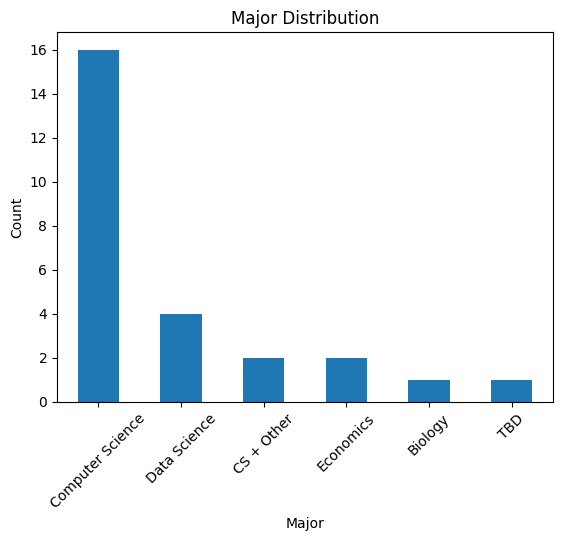

In [40]:
# major distribution bar chart
major_dist = df['Major'].value_counts()
major_dist.plot(kind='bar')
plt.xlabel('Major')
plt.ylabel('Count')
plt.title('Major Distribution')
plt.xticks(rotation=45)

This histograms shows that the vast majority of students in CSCI 1070 are majoring in Computer Science or Data Science, with a few outliers in other quantitative degree programs.

Text(0.5, 1.0, 'Density of Ages')

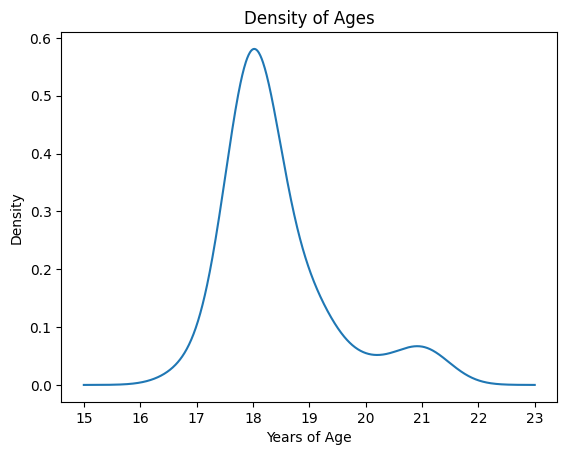

In [41]:
# age histogram
#ages.plot(range(17, 22), range(0, 20),kind='hist')
ages.plot(kind= 'density')
plt.xlabel('Years of Age')
plt.ylabel('Density')
plt.title('Density of Ages')

This density chart shows that most of the students taking this course are about 18 which aligns with the class being an intro course for freshmen in the CS and DS programs. The small number of 20 and 21 year olds aligns with the amount of non-CS/DS students taking this class, as they are likely upperclassmen taking the course as a supplement to their main coursework.

Text(0.5, 1.0, 'Pie Chart of Student Birth Places')

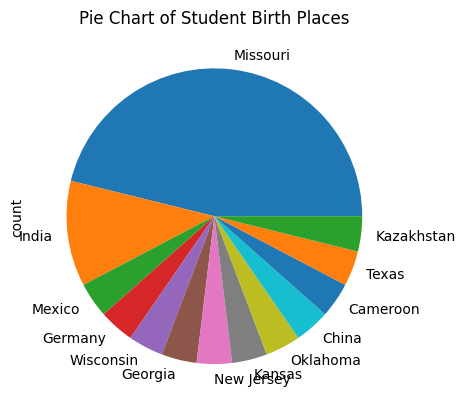

In [42]:
# birthplace chart
birth_place.plot(kind='pie')
plt.title('Distribution of Student Birth Places')

This pie chart shows the distribution of the students birth places. The majority of students are from the US with most people being from Missouri, while there are a few students that were born in foreign countries.

Text(0.5, 1.0, 'Distribution of Students Favorite Cuisine')

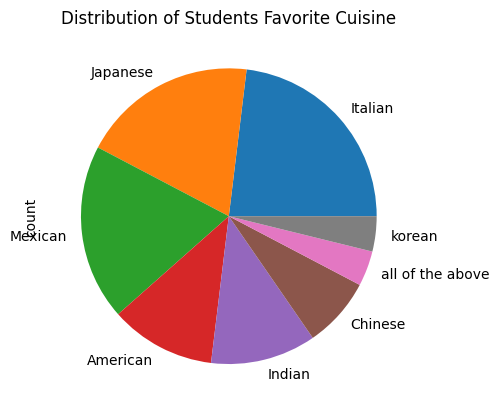

In [44]:
fav_food.plot(kind='pie')
plt.title('Distribution of Students Favorite Cuisine')

This pie chart shows that the students have a wide variety of favorite cuisines, with an almost even distribution between Japanese, Italian, and Mexican.

(array([0, 1]), [Text(0, 0, 'No Pets'), Text(1, 0, 'At least 1 Dog or Cat')])

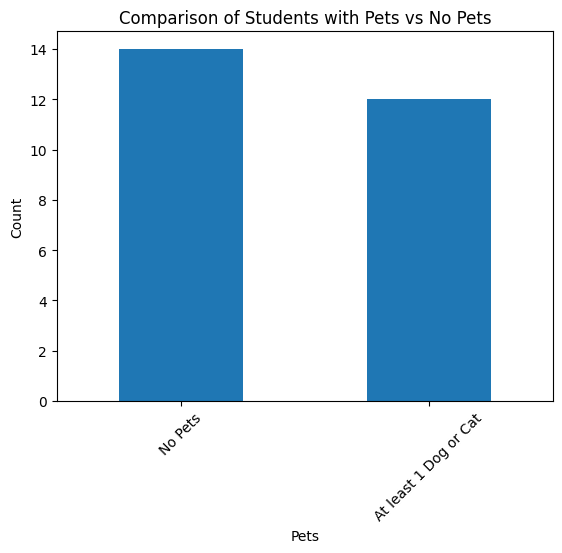

In [71]:
pets.plot(kind='bar')
plt.xlabel('Pets')
plt.ylabel('Count')
plt.title('Comparison of Students with Pets vs No Pets')
plt.xticks(rotation=45)

This bar chart shows that the majority of students in class do not have a pet, but a significant number have at least one cat or dog.